In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [19]:
labels = pd.read_csv("./data/samples.csv", dtype={"notes":"str"})

In [20]:
import scipy.io.wavfile
import os

inputpath = "./data" 
inputlength =  5
SR = 16000
outputlength = 16000 * 5

applyFFT = False

inputfiles = os.listdir(inputpath)

split_into = 1
req_inputlength = split_into * outputlength

angle = []
energy = []

for i, file in enumerate(inputfiles):
    if file.split(".")[1] != "wav":
        continue
    sr, data = scipy.io.wavfile.read(inputpath + "/" + file)
    idx = int(file.split(".")[0])
    if sr != SR:
        raise(f"Samplerate of {file} is {sr} instead of {SR}")
    
    if len(data) < req_inputlength:
        raise(f"File {file} is not long enough")

    # X_long = np.vstack((X_long, data[:,0]))
    
    start_of_block = (len(data) - req_inputlength) // 2
    data_block = data[start_of_block:start_of_block+req_inputlength, 1]
    energy.append(np.sum(data_block**2))
    angle.append(labels.loc[labels.idx==idx, "q_0"].item())

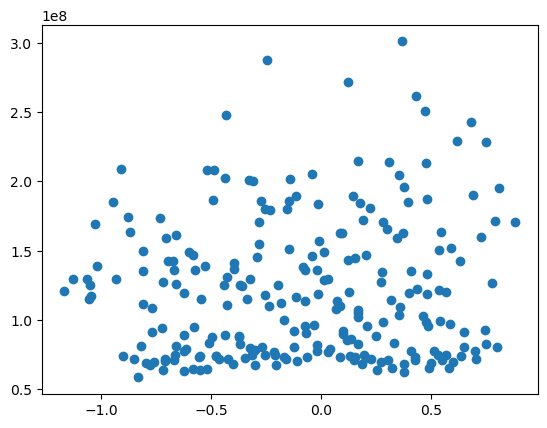

In [24]:
plt.scatter(angle, energy)

(50000000.0, 100000000.0)

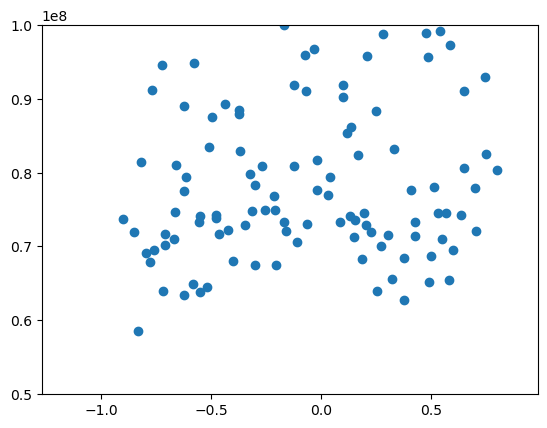

In [25]:
plt.scatter(angle, energy)
plt.ylim(.5*1e8, 1e8)

In [26]:
np.corrcoef(angle, energy)

array([[1.        , 0.08295351],
       [0.08295351, 1.        ]])

In [30]:
np.corrcoef(np.abs(angle - np.median(angle)), energy)

array([[1.       , 0.0155798],
       [0.0155798, 1.       ]])